In [179]:
import pandas as pd
import numpy as np
import mymodule
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [180]:
df = pd.read_csv('StudentsPerformance.csv')

### Dataset description

In [181]:
df.head(5)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0


In [182]:
df.iloc[52:60]

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
52,male,group C,some college,standard,none,53.0,44.0,42.0
53,male,group D,high school,standard,none,NaN,78.0,75.0
54,female,group C,some high school,free/reduced,completed,71.0,84.0,87.0
55,female,group C,high school,free/reduced,none,33.0,NaN,43.0
56,female,group E,associate's degree,standard,completed,82.0,85.0,86.0
57,male,group D,associate's degree,standard,none,52.0,55.0,NaN
58,male,group D,some college,standard,completed,58.0,59.0,58.0
59,female,group C,some high school,free/reduced,none,0.0,17.0,10.0


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531 entries, 0 to 530
Data columns (total 8 columns):
gender                         531 non-null object
race/ethnicity                 531 non-null object
parental_level_of_education    531 non-null object
lunch                          531 non-null object
test_preparation_course        531 non-null object
math_score                     492 non-null float64
reading_score                  498 non-null float64
writing_score                  506 non-null float64
dtypes: float64(3), object(5)
memory usage: 33.3+ KB


In [184]:
df.describe()

,math_score,reading_score,writing_score
count,492.000000,498.000000,506.000000
mean,65.660569,68.767068,67.594862
std,15.082145,14.807482,15.002703
min,0.000000,17.000000,10.000000
25%,56.000000,58.000000,57.000000
50%,66.000000,70.000000,69.000000
75%,76.000000,80.000000,78.000000
max,100.000000,100.000000,100.000000


### Replace value in target column

In [185]:
df = df.replace({'none': 0, 'completed': 1})

In [186]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,0,72.0,72.0,74.0
1,female,group C,some college,standard,1,69.0,90.0,88.0
2,female,group B,master's degree,standard,0,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,0,47.0,57.0,44.0
4,male,group C,some college,standard,0,76.0,78.0,75.0


## Create different data frames with dropped (categorical or numerical) and target columns

In [187]:
targets = df['test_preparation_course'].astype('category')

label_color = ['green' if i == 1 else 'red' for i in targets]

print(label_color[:5])

['red', 'green', 'red', 'red', 'red']


In [188]:
categorical = ['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch']

df = df.drop(labels='test_preparation_course', axis=1)

data_dropped = df.drop(labels=categorical, axis=1, inplace=False)

In [189]:
data_dropped.head()

,math_score,reading_score,writing_score
0,72.0,72.0,74.0
1,69.0,90.0,88.0
2,90.0,95.0,93.0
3,47.0,57.0,44.0
4,76.0,78.0,75.0


In [190]:
numerical = ['math_score', 'reading_score', 'writing_score']

data_numerical_dropped = df.drop(labels=numerical, axis=1, inplace=False)

In [191]:
data_numerical_dropped.head()

,gender,race/ethnicity,parental_level_of_education,lunch
0,female,group B,bachelor's degree,standard
1,female,group C,some college,standard
2,female,group B,master's degree,standard
3,male,group A,associate's degree,free/reduced
4,male,group C,some college,standard


# Nans

In [192]:
df_dict = {}

### Drop rows with na

Дані зчитуються заново, щоб створити нові датафрейми (без категоріальних або без чисельних) та без цільових стовпчиків. Так як після видалення рядків змінюється розмірність й для застосування лінійної регресії потрібно створити відповідні датафрейми targets, data_dropped, data_numerical_dropped

In [193]:
df1 = pd.read_csv('StudentsPerformance.csv')

In [194]:
df1.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0


In [195]:
df_without_nan = mymodule.delete_nulls(df1, axis='row')

categorical = ['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch']

df_without_rows_with_nan = df_without_nan.drop(labels=categorical, axis=1, inplace=False)

numerical = ['math_score', 'reading_score', 'writing_score']

data_numerical_dropped_without_rows_with_nan = df_without_nan.drop(labels=numerical, axis=1, inplace=False)

In [196]:
df_without_rows_with_nan = df_without_rows_with_nan.replace({'none': 0, 'completed': 1})

targets_without_rows_with_nan = df_without_rows_with_nan['test_preparation_course'].astype('category')

label_color_without_rows_with_nan = ['green' if i == 1 else 'red' for i in targets_without_rows_with_nan]

print(label_color_without_rows_with_nan[:5])

df_without_rows_with_nan = df_without_rows_with_nan.drop(labels='test_preparation_course', axis=1)
data_numerical_dropped_without_rows_with_nan = data_numerical_dropped_without_rows_with_nan.drop(labels='test_preparation_course', axis=1)

['red', 'green', 'red', 'red', 'red']


In [197]:
df_dict['df_without_rows_with_nan'] = df_without_rows_with_nan

### Replace na with mean

In [198]:
df_with_mean_instead_of_nan = mymodule.replace_nulls(data_dropped, value='mean')
df_dict['df_with_mean_instead_of_nan'] = df_with_mean_instead_of_nan

[[72. 72. 74.]
 [69. 90. 88.]
 [90. 95. 93.]
 ...
 [nan 74. 70.]
 [68. 67. 73.]
 [47. nan 53.]]


In [199]:
data_dropped.iloc[53:58]

,math_score,reading_score,writing_score
53,NaN,78.0,75.0
54,71.0,84.0,87.0
55,33.0,NaN,43.0
56,82.0,85.0,86.0
57,52.0,55.0,NaN


In [200]:
df_with_mean_instead_of_nan.iloc[53:58]

,math_score,reading_score,writing_score
53,65.660569,78.000000,75.000000
54,71.000000,84.000000,87.000000
55,33.000000,68.767068,43.000000
56,82.000000,85.000000,86.000000
57,52.000000,55.000000,67.594862


### Replace na with median

In [201]:
df_with_median_instead_of_nan = mymodule.replace_nulls(data_dropped, value='median')
df_dict['df_with_median_instead_of_nan'] = df_with_median_instead_of_nan

[[72. 72. 74.]
 [69. 90. 88.]
 [90. 95. 93.]
 ...
 [nan 74. 70.]
 [68. 67. 73.]
 [47. nan 53.]]


In [202]:
data_dropped.iloc[53:58]

,math_score,reading_score,writing_score
53,NaN,78.0,75.0
54,71.0,84.0,87.0
55,33.0,NaN,43.0
56,82.0,85.0,86.0
57,52.0,55.0,NaN


In [203]:
df_with_median_instead_of_nan.iloc[53:58]

,math_score,reading_score,writing_score
53,66.0,78.0,75.0
54,71.0,84.0,87.0
55,33.0,70.0,43.0
56,82.0,85.0,86.0
57,52.0,55.0,69.0


### Replace na with mode

In [204]:
df_with_mode_instead_of_nan = mymodule.replace_nulls(data_dropped, value='mode')
df_dict['df_with_mode_instead_of_nan'] = df_with_mode_instead_of_nan

[[72. 72. 74.]
 [69. 90. 88.]
 [90. 95. 93.]
 ...
 [nan 74. 70.]
 [68. 67. 73.]
 [47. nan 53.]]


In [205]:
data_dropped.iloc[53:58]

,math_score,reading_score,writing_score
53,NaN,78.0,75.0
54,71.0,84.0,87.0
55,33.0,NaN,43.0
56,82.0,85.0,86.0
57,52.0,55.0,NaN


In [206]:
df_with_mode_instead_of_nan.iloc[53:58]

,math_score,reading_score,writing_score
53,59.0,78.0,75.0
54,71.0,84.0,87.0
55,33.0,74.0,43.0
56,82.0,85.0,86.0
57,52.0,55.0,70.0


## Logistic regression

In [207]:
def log_regression(df, targets):
    X_train, X_test, y_train, y_test = train_test_split(df, targets, test_size=0.2, random_state=0)

    lr = LogisticRegression()

    lr = lr.fit(X_train, y_train)

    y_pred = lr.predict(X_test)

    score = accuracy_score(y_test, y_pred)
    
    return score

### PCA

In [208]:
def pca_func(df):
    pca = PCA(n_components=2)

    pca.fit(df)

    T = pca.transform(df)

    T = pd.DataFrame(T)
    
    T.columns = ['PCA component 1', 'PCA component 2']
    T.plot.scatter(x='PCA component 1', y='PCA component 2', marker='o',
            alpha=0.7, # opacity
            color=label_color,
            title="red: 0, green: 1" )
    plt.show()
    
    
    return T

# Predict

Створено 4 датафрейми: <br>
<ul>
    <li>Датафрейм з видаленими рядками, у яких є nan (df_without_rows_with_nan)</li>
    <li>Датафрейм, де nan замінено на середнє значення колонки (df_with_mean_instead_of_nan)</li>
    <li>Датафрейм, де nan замінено на медіану колонки (df_with_median_instead_of_nan)</li>
    <li>Датафрейм, де nan замінено на моду колонки (df_with_mode_instead_of_nan)</li>
</ul>

Далі над кожним датафреймом проводяться наступні дії: <br>
<ul>
    <li>PCA (n = 2)</li>
    <li>Додаються категоріальні змінні</li>
    <li>До датафрейму з категоріальними змінними застосовується PCA</li>
    <li>Масштабується та стандартизується датафрейм з категоріальними змінними</li>
    <li>До масштабованого і стандартизованого датафреймів також застосовується PCA</li>
</ul>


====== DataFrame: df_without_rows_with_nan ======


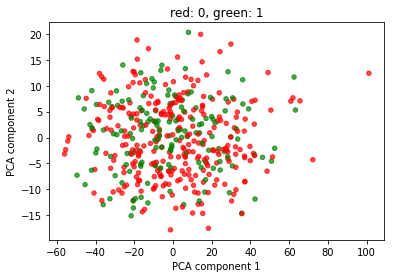

score:  0.7613636363636364
score_pca:  0.7045454545454546
-----------------------------------------------------------------


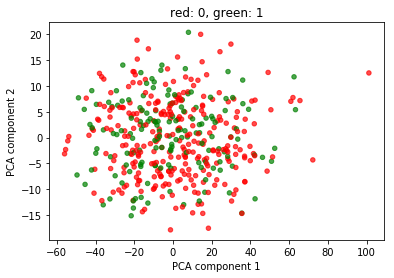

score_with_categorical:  0.8068181818181818
score_with_categorical_pca:  0.7045454545454546
-----------------------------------------------------------------


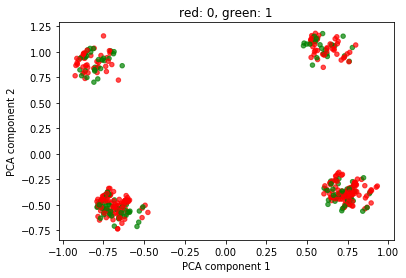

score_with_categorical_scale:  0.6931818181818182
score_with_categorical_scale_pca:  0.6704545454545454
-----------------------------------------------------------------


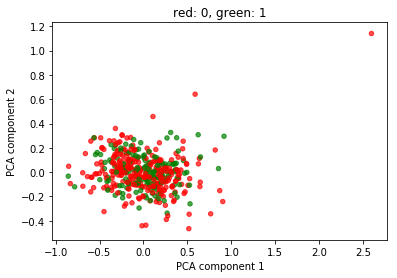

score_with_categorical_standartize:  0.6931818181818182
score_with_categorical_standartize_pca:  0.6931818181818182
-----------------------------------------------------------------
*******************************************************************************************
====== DataFrame: df_with_mean_instead_of_nan ======


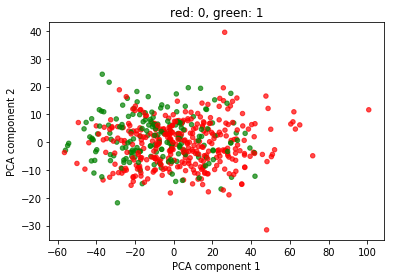

score:  0.6822429906542056
score_pca:  0.6542056074766355
-----------------------------------------------------------------


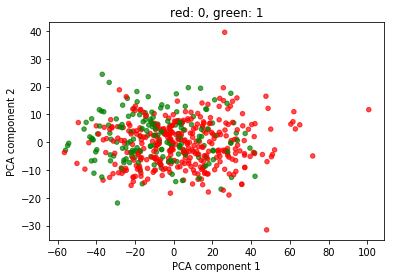

score_with_categorical:  0.719626168224299
score_with_categorical_pca:  0.6542056074766355
-----------------------------------------------------------------


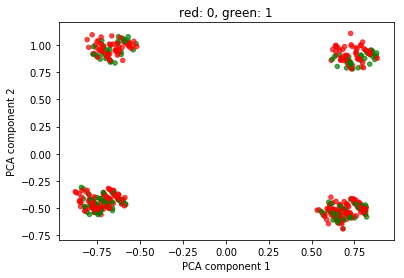

score_with_categorical_scale:  0.6728971962616822
score_with_categorical_scale_pca:  0.6542056074766355
-----------------------------------------------------------------


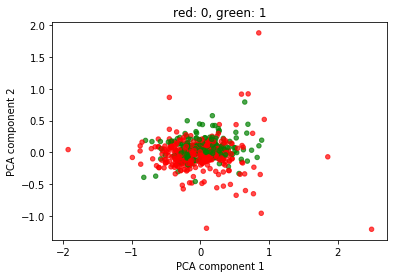

score_with_categorical_standartize:  0.6728971962616822
score_with_categorical_standartize_pca:  0.6728971962616822
-----------------------------------------------------------------
*******************************************************************************************
====== DataFrame: df_with_median_instead_of_nan ======


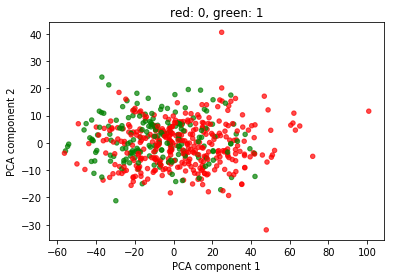

score:  0.6915887850467289
score_pca:  0.6542056074766355
-----------------------------------------------------------------


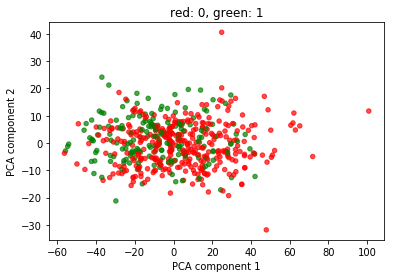

score_with_categorical:  0.719626168224299
score_with_categorical_pca:  0.6542056074766355
-----------------------------------------------------------------


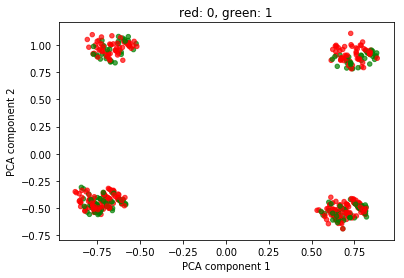

score_with_categorical_scale:  0.6728971962616822
score_with_categorical_scale_pca:  0.6542056074766355
-----------------------------------------------------------------


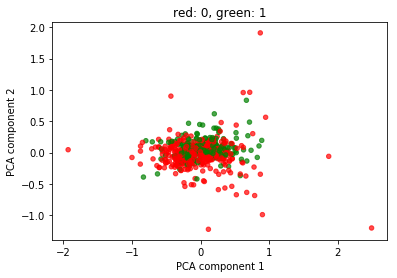

score_with_categorical_standartize:  0.6728971962616822
score_with_categorical_standartize_pca:  0.6728971962616822
-----------------------------------------------------------------
*******************************************************************************************
====== DataFrame: df_with_mode_instead_of_nan ======


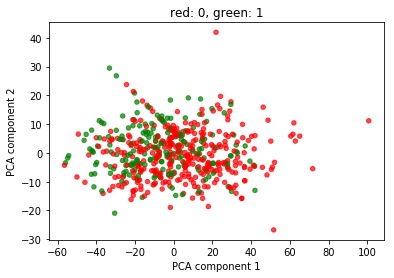

score:  0.6915887850467289
score_pca:  0.6542056074766355
-----------------------------------------------------------------


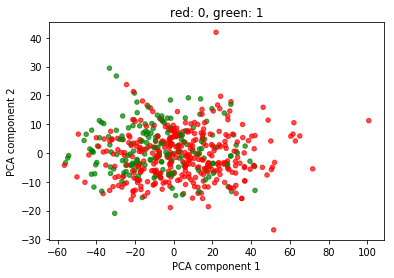

score_with_categorical:  0.7102803738317757
score_with_categorical_pca:  0.6542056074766355
-----------------------------------------------------------------


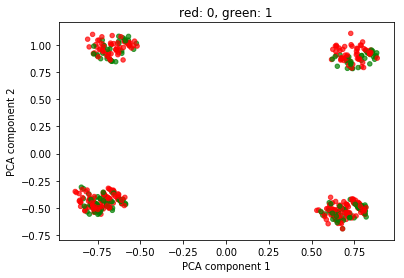

score_with_categorical_scale:  0.6728971962616822
score_with_categorical_scale_pca:  0.6542056074766355
-----------------------------------------------------------------


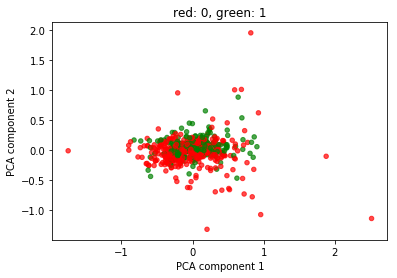

score_with_categorical_standartize:  0.6635514018691588
score_with_categorical_standartize_pca:  0.6635514018691588
-----------------------------------------------------------------
*******************************************************************************************


In [209]:
# predict
for name, df in df_dict.items():
    if name == 'df_without_rows_with_nan':
        local_targets = targets_without_rows_with_nan
        data_num_dropped = data_numerical_dropped_without_rows_with_nan
    else:
        local_targets = targets
        data_num_dropped = data_numerical_dropped
    
    print(f'====== DataFrame: {name} ======')
    
    score = log_regression(df, local_targets)
    df_pca = pca_func(df)
    score_pca = log_regression(df_pca, local_targets)
    print(f'score: ', score)
    print(f'score_pca: ', score_pca)
    print('-----------------------------------------------------------------')
    
    df_with_categorical = pd.concat([data_num_dropped, df], axis=1)
    
    df_with_categorical = pd.get_dummies(df_with_categorical, columns=categorical)
    df_with_categorical_pca = pca_func(df_with_categorical)
    score_with_categorical = log_regression(df_with_categorical, local_targets)
    score_with_categorical_pca = log_regression(df_with_categorical_pca, local_targets)
    print(f'score_with_categorical: ', score_with_categorical)
    print(f'score_with_categorical_pca: ', score_with_categorical_pca)
    print('-----------------------------------------------------------------')
    
    df_with_categorical_scale = mymodule.scale(df_with_categorical, columns=df_with_categorical.columns.values.tolist())
    df_with_categorical_scale_pca = pca_func(df_with_categorical_scale)
    score_with_categorical_scale = log_regression(df_with_categorical_scale, local_targets)
    score_with_categorical_scale_pca = log_regression(df_with_categorical_scale_pca, local_targets)
    print(f'score_with_categorical_scale: ', score_with_categorical_scale)
    print(f'score_with_categorical_scale_pca: ', score_with_categorical_scale_pca)
    print('-----------------------------------------------------------------')
    
    df_with_categorical_standartize = mymodule.standartize(df_with_categorical)
    df_with_categorical_standartize_pca = pca_func(df_with_categorical_standartize)
    score_with_categorical_standartize = log_regression(df_with_categorical_standartize, local_targets)
    score_with_categorical_standartize_pca = log_regression(df_with_categorical_standartize_pca, local_targets)
    print(f'score_with_categorical_standartize: ', score_with_categorical_standartize)
    print(f'score_with_categorical_standartize_pca: ', score_with_categorical_standartize_pca)
    print('-----------------------------------------------------------------')

    print('*******************************************************************************************')
    

### Бачимо, що найкращий score у випадку коли ми видаляємо рядки з nan (DataFrame: df_without_rows_with_nan), що містять nan і робимо one hot encoding. У цьому випадку score(score_with_categorical) = 0.806

Також можна побачити, що майже завжди після застосування pca score зменшується. <br>
Для кожного дата фрейму найкращий score у випадку, коли ми до початкового датафрейму додаємо категоріальні змінні